# Load and Tidy Synthetic Data

## Prep

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import re
import matplotlib.pyplot as plt

## Functions

### Read tables

In [2]:
def read_table_csv (table_name):
    
    '''
    Takes as input the name of the tables to read from the synthea download.
    Assumes the folder synthea_1m_fhir_3_0_May24 is in the current working dir.
    Loops over all 12 output directories, reads the table specified and concatinates
    them in a single table.
    '''
    
    # Read and merge all csv tables for observations:
    for i in range (1, 13):


        # Declare path to table:
        path = os.getcwd() + '\\synthea_1m_fhir_3_0_May_24\\output_'+str(i)+'\\'+table_name+'.csv'

        print (f'Reading table {table_name} - {i} ...')

        if i == 1: # reading first table
            df = pd.read_csv (path)

        else: # reading subsequent tables
            a = pd.read_csv (path)

            print (f'Appending table numer {i}...')

            # merge with existin observations table:
            df = df.append (
                a, ignore_index = True
            )

            # Clean up memory
            del a

        print (f'Table number {i} appended!')
        print (f'Total table size is {df.shape[0]}.\n ------------------------')
    
    return df

---

## Read Tables

### Allergies

#### Read table

In [32]:
allergies = read_table_csv('allergies')

Reading table allergies - 1 ...
Table number 1 appended!
Total table size is 51739.
 ------------------------
Reading table allergies - 2 ...
Appending table numer 2...
Table number 2 appended!
Total table size is 103635.
 ------------------------
Reading table allergies - 3 ...
Appending table numer 3...
Table number 3 appended!
Total table size is 156035.
 ------------------------
Reading table allergies - 4 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (
C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Appending table numer 4...
Table number 4 appended!
Total table size is 208522.
 ------------------------
Reading table allergies - 5 ...
Appending table numer 5...
Table number 5 appended!
Total table size is 260733.
 ------------------------
Reading table allergies - 6 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (
C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Appending table numer 6...
Table number 6 appended!
Total table size is 313182.
 ------------------------
Reading table allergies - 7 ...
Appending table numer 7...
Table number 7 appended!
Total table size is 365539.
 ------------------------
Reading table allergies - 8 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (
C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Appending table numer 8...
Table number 8 appended!
Total table size is 417862.
 ------------------------
Reading table allergies - 9 ...
Appending table numer 9...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (
C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 9 appended!
Total table size is 469536.
 ------------------------
Reading table allergies - 10 ...
Appending table numer 10...
Table number 10 appended!
Total table size is 521115.
 ------------------------
Reading table allergies - 11 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Appending table numer 11...
Table number 11 appended!
Total table size is 573026.
 ------------------------
Reading table allergies - 12 ...
Appending table numer 12...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (
C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 12 appended!
Total table size is 624611.
 ------------------------


In [33]:
print(allergies.shape)
display(allergies)

(624611, 6)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1997-09-13,2015-03-01,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,63dbbe97-0f0a-4b11-abed-a507b632f059,91930004,Allergy to eggs
1,1997-09-13,NaN,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,63dbbe97-0f0a-4b11-abed-a507b632f059,419263009,Allergy to tree pollen
2,1997-09-13,NaN,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,63dbbe97-0f0a-4b11-abed-a507b632f059,424213003,Allergy to bee venom
3,1980-06-22,NaN,6e9f8b3e-5a21-401e-868d-2d62e0e7f452,dd8f1a5a-9f6c-4418-8b88-c49c49377b6c,300913006,Shellfish allergy
4,2008-01-07,NaN,d8de9d90-3a96-4ee5-a750-d406ee10e18a,44e7f436-8f1b-411f-a44c-6e3ace7b7a11,91935009,Allergy to peanuts
...,...,...,...,...,...,...
624606,1950-01-19,NaN,366aaadf-d61c-4285-8850-c76e102b26cd,b26546e0-5f03-4b77-b9bc-aa3f81fcb703,418689008,Allergy to grass pollen
624607,1963-05-08,NaN,164a7c02-fbe9-4971-b4b2-e6f173b7d684,4914723d-e57c-4b2b-89ab-248a2e26188f,417532002,Allergy to fish
624608,1963-05-08,NaN,164a7c02-fbe9-4971-b4b2-e6f173b7d684,4914723d-e57c-4b2b-89ab-248a2e26188f,232347008,Dander (animal) allergy
624609,1979-09-28,NaN,22ed0f40-b6d1-4722-b087-2a79fd0ad6da,a69d9d46-31b5-4de6-8ae7-218d43dc050b,419263009,Allergy to tree pollen


#### Tidy table

Make sure `START` and `STOP` are datetime

In [34]:
print(pd.api.types.is_datetime64_any_dtype(allergies['START']))
print(pd.api.types.is_datetime64_any_dtype(allergies.STOP))

allergies['START'] = pd.to_datetime(allergies.START)

allergies['STOP'] = pd.to_datetime(allergies.STOP)

print(pd.api.types.is_datetime64_any_dtype(allergies['START']))
print(pd.api.types.is_datetime64_any_dtype(allergies.STOP))

False
False
True
True


Check what unique values for `DESCRIPTION` (allergy types) there are.

In [35]:
print('Allergy types:\n', list(set(allergies.DESCRIPTION)))
print('Allergy type number:\n', len(list(set(allergies.DESCRIPTION))))

Allergy types:
 ['Allergy to peanuts', 'Allergy to wheat', 'Allergy to soya', 'Allergy to dairy product', 'Allergy to bee venom', 'Allergy to tree pollen', 'Allergy to eggs', 'Allergy to nut', 'Allergy to grass pollen', 'House dust mite allergy', 'Latex allergy', 'Shellfish allergy', 'Allergy to mould', 'Allergy to fish', 'Dander (animal) allergy']
Allergy type number:
 15


Remove entries with no `START` and no `CODE`.

In [36]:
print('Dimensions of table:\n', allergies.shape)

Dimensions of table:
 (624611, 6)


In [37]:
allergies = allergies[~allergies.START.isna()]
allergies = allergies[~allergies.CODE.isna()]
allergies = allergies[~allergies.PATIENT.isna()]
print('Dimensions of table:\n', allergies.shape)

Dimensions of table:
 (624611, 6)


In [38]:
valid_patient_format = allergies.PATIENT.apply(lambda x: 
                                               bool(
                                                   re.match(
                                                       r'^[0-9a-z]{8}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{12}$', 
                                                       str(x))))
print('All patients are in valid format?\n', valid_patient_format.all())

All patients are in valid format?
 True


#### Save tidy table

In [39]:
# open a file, where you ant to store the data
file = open('allergies.pkl', 'wb')

# dump information to that file
pickle.dump(allergies, file)

# Clean up space
del allergies, file

---

### Careplans

#### Read table

In [40]:
careplans = read_table_csv('careplans')

Reading table careplans - 1 ...
Table number 1 appended!
Total table size is 796057.
 ------------------------
Reading table careplans - 2 ...
Appending table numer 2...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 2 appended!
Total table size is 1595043.
 ------------------------
Reading table careplans - 3 ...
Appending table numer 3...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 3 appended!
Total table size is 2388911.
 ------------------------
Reading table careplans - 4 ...
Appending table numer 4...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 4 appended!
Total table size is 3184353.
 ------------------------
Reading table careplans - 5 ...
Appending table numer 5...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 5 appended!
Total table size is 3981849.
 ------------------------
Reading table careplans - 6 ...
Appending table numer 6...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 6 appended!
Total table size is 4778160.
 ------------------------
Reading table careplans - 7 ...
Appending table numer 7...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 7 appended!
Total table size is 5570673.
 ------------------------
Reading table careplans - 8 ...
Appending table numer 8...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 8 appended!
Total table size is 6369655.
 ------------------------
Reading table careplans - 9 ...
Appending table numer 9...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 9 appended!
Total table size is 7168204.
 ------------------------
Reading table careplans - 10 ...
Appending table numer 10...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 10 appended!
Total table size is 7963566.
 ------------------------
Reading table careplans - 11 ...
Appending table numer 11...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 11 appended!
Total table size is 8762836.
 ------------------------
Reading table careplans - 12 ...
Appending table numer 12...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 12 appended!
Total table size is 9558659.
 ------------------------


In [41]:
print(careplans.shape)
display(careplans)

(9558659, 9)


,ID,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,cd96613b-22cd-4b70-8847-55008ee6bd0c,2012-11-21,2012-12-14,660bec03-9e58-47f2-98b9-2f1c564f3838,dbe481ce-b961-4f43-ac0a-07fa8cfa8bdd,872781000000100,Musculoskeletal care,39848009.0,Whiplash injury to neck
1,cd96613b-22cd-4b70-8847-55008ee6bd0c,2012-11-21,2012-12-14,660bec03-9e58-47f2-98b9-2f1c564f3838,dbe481ce-b961-4f43-ac0a-07fa8cfa8bdd,266694003,Heat therapy,39848009.0,Whiplash injury to neck
2,cd96613b-22cd-4b70-8847-55008ee6bd0c,2012-11-21,2012-12-14,660bec03-9e58-47f2-98b9-2f1c564f3838,dbe481ce-b961-4f43-ac0a-07fa8cfa8bdd,183051005,Recommendation to rest,39848009.0,Whiplash injury to neck
3,794bb6c1-7476-49d1-b9d2-22764340b089,2013-12-04,2014-02-12,660bec03-9e58-47f2-98b9-2f1c564f3838,b5f1ab7e-5e67-4070-bcf0-52451eb20551,53950000,Respiratory therapy,10509002.0,Acute bronchitis (disorder)
4,794bb6c1-7476-49d1-b9d2-22764340b089,2013-12-04,2014-02-12,660bec03-9e58-47f2-98b9-2f1c564f3838,b5f1ab7e-5e67-4070-bcf0-52451eb20551,304510005,Recommendation to avoid exercise,10509002.0,Acute bronchitis (disorder)
...,...,...,...,...,...,...,...,...,...
9558654,d3274e71-046e-4efa-970f-31cb4f48f086,1957-12-11,NaN,de7374d5-f181-45ba-9a00-9bcddc45c2a7,56f9b8f1-8867-42fa-b796-d3953ff4653a,160670007,Diabetic diet,15777000.0,Prediabetes
9558655,d3274e71-046e-4efa-970f-31cb4f48f086,1957-12-11,NaN,de7374d5-f181-45ba-9a00-9bcddc45c2a7,56f9b8f1-8867-42fa-b796-d3953ff4653a,229065009,Exercise therapy,15777000.0,Prediabetes
9558656,a9964aa2-f5ba-4d4d-b11a-7aaedf3a6fd7,2012-11-25,2012-12-21,de7374d5-f181-45ba-9a00-9bcddc45c2a7,0f0c2769-6955-485c-95eb-8a5866b948fd,91251008,Physical therapy procedure,44465007.0,Sprain of ankle
9558657,a9964aa2-f5ba-4d4d-b11a-7aaedf3a6fd7,2012-11-25,2012-12-21,de7374d5-f181-45ba-9a00-9bcddc45c2a7,0f0c2769-6955-485c-95eb-8a5866b948fd,229586001,Rest ice compression and elevation treatment...,44465007.0,Sprain of ankle


#### Tidy table

Make sure `START` and `STOP` are datetime

In [42]:
print(pd.api.types.is_datetime64_any_dtype(careplans['START']))
print(pd.api.types.is_datetime64_any_dtype(careplans.STOP))

careplans['START'] = pd.to_datetime(careplans.START)

careplans['STOP'] = pd.to_datetime(careplans.STOP)

print(pd.api.types.is_datetime64_any_dtype(careplans['START']))
print(pd.api.types.is_datetime64_any_dtype(careplans.STOP))

False
False
True
True


Check what unique values for `DESCRIPTION` (allergy types) there are.

In [43]:
print('Careplan types:\n', list(set(careplans.DESCRIPTION)))
print('Careplan type number:\n', len(list(set(careplans.DESCRIPTION))))

Careplan types:
 ['Stress management', 'Comfort measures', 'Dressing change management', 'Recommendation to rest', 'Cancer education', 'Smoking cessation therapy', 'Allergen immunotherapy drugs Band 1', 'Demential management', 'Liquid diet', 'Wound care', 'Heat therapy', 'Cancer care plan', 'Physical exercises', 'Home nebulizer therapy', 'Rest  ice  compression and elevation treatment programme', 'Colonoscopy planned', 'Breathing control', 'Burn care', 'Discussion about hygiene', 'Chronic obstructive pulmonary disease clinical management plan', 'Recommendation to limit sexual activity', 'Physical activity target light exercise', 'Pregnancy diet education', 'Pulmonary rehabilitation (regime/therapy)', 'Behavior to prevent infection', 'Angina self management plan', 'Drug addiction counseling', 'Recommendation to avoid exercise', 'Asthma self management', 'Food allergy diet', 'Urinary tract infection care', 'Promotion of use of memory skills', 'Respiratory therapy', 'Self care', 'Physical

Remove entries with no `START`, no `PATIENT` id and no `CODE`.

In [44]:
print('Dimensions of table:\n', careplans.shape)
careplans = careplans[~careplans.START.isna()]
careplans = careplans[~careplans.CODE.isna()]
careplans = careplans[~careplans.PATIENT.isna()]
print('Dimensions of table:\n', careplans.shape)

Dimensions of table:
 (9558659, 9)
Dimensions of table:
 (9558659, 9)


In [45]:
valid_patient_format = careplans.PATIENT.apply(lambda x: 
                                               bool(
                                                   re.match(
                                                       r'^[0-9a-z]{8}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{12}$', 
                                                       str(x))))
print('All patients are in valid format?\n', valid_patient_format.all())

All patients are in valid format?
 True


#### Save tidy table

In [46]:
# open a file, where you ant to store the data
file = open('careplans.pkl', 'wb')

# dump information to that file
pickle.dump(careplans, file)

# Clean up space
del careplans, file

---

### Conditions

#### Read table

In [47]:
conditions = read_table_csv('conditions')

Reading table conditions - 1 ...
Table number 1 appended!
Total table size is 483462.
 ------------------------
Reading table conditions - 2 ...
Appending table numer 2...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 2 appended!
Total table size is 969620.
 ------------------------
Reading table conditions - 3 ...
Appending table numer 3...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 3 appended!
Total table size is 1452949.
 ------------------------
Reading table conditions - 4 ...
Appending table numer 4...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 4 appended!
Total table size is 1937513.
 ------------------------
Reading table conditions - 5 ...
Appending table numer 5...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 5 appended!
Total table size is 2422797.
 ------------------------
Reading table conditions - 6 ...
Appending table numer 6...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 6 appended!
Total table size is 2907519.
 ------------------------
Reading table conditions - 7 ...
Appending table numer 7...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 7 appended!
Total table size is 3389571.
 ------------------------
Reading table conditions - 8 ...
Appending table numer 8...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 8 appended!
Total table size is 3872935.
 ------------------------
Reading table conditions - 9 ...
Appending table numer 9...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 9 appended!
Total table size is 4357873.
 ------------------------
Reading table conditions - 10 ...
Appending table numer 10...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 10 appended!
Total table size is 4840908.
 ------------------------
Reading table conditions - 11 ...
Appending table numer 11...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 11 appended!
Total table size is 5325257.
 ------------------------
Reading table conditions - 12 ...
Appending table numer 12...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 12 appended!
Total table size is 5809954.
 ------------------------


In [48]:
print(conditions.shape)
display(conditions)

(5809954, 6)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2011-05-07,2011-06-03,36d131ee-dd5b-4acb-acbe-19961c32c099,ff93cedb-8245-4091-838d-a568bcbcb00b,444814009,Viral sinusitis (disorder)
1,2014-01-04,2014-02-06,33f33990-ae8b-4be8-938f-e47ad473abfe,714fd61a-f9fd-43ff-87b9-3cc45a3f1e53,444814009,Viral sinusitis (disorder)
2,2015-07-06,2015-09-02,33f33990-ae8b-4be8-938f-e47ad473abfe,45044100-aaba-4209-8ad1-15383c76842d,36971009,Sinusitis (disorder)
3,2014-08-03,2014-09-05,36d131ee-dd5b-4acb-acbe-19961c32c099,ffdddbfb-35e8-4a74-a801-89e97feed2f3,444814009,Viral sinusitis (disorder)
4,2017-01-02,2017-01-31,33f33990-ae8b-4be8-938f-e47ad473abfe,6232be20-5cec-471f-b0ed-0e046d374e80,444814009,Viral sinusitis (disorder)
...,...,...,...,...,...,...
5809949,1999-08-06,NaN,7dccb70e-973e-4855-a69d-7df63b866968,f97492d8-eeca-4b20-933d-0eb4473afbc1,254637007,Non-small cell lung cancer (disorder)
5809950,1999-08-08,NaN,7dccb70e-973e-4855-a69d-7df63b866968,f97492d8-eeca-4b20-933d-0eb4473afbc1,423121009,Non-small cell carcinoma of lung TNM stage 4 ...
5809951,1957-12-11,NaN,de7374d5-f181-45ba-9a00-9bcddc45c2a7,56f9b8f1-8867-42fa-b796-d3953ff4653a,15777000,Prediabetes
5809952,2012-11-25,2012-12-21,de7374d5-f181-45ba-9a00-9bcddc45c2a7,0f0c2769-6955-485c-95eb-8a5866b948fd,44465007,Sprain of ankle


#### Tidy table

Make sure `START` and `STOP` are datetime

In [49]:
print(pd.api.types.is_datetime64_any_dtype(conditions['START']))
print(pd.api.types.is_datetime64_any_dtype(conditions.STOP))

conditions['START'] = pd.to_datetime(conditions.START)

conditions['STOP'] = pd.to_datetime(conditions.STOP)

print(pd.api.types.is_datetime64_any_dtype(conditions['START']))
print(pd.api.types.is_datetime64_any_dtype(conditions.STOP))

False
False
True
True


Check what unique values for `DESCRIPTION` (allergy types) there are.

In [50]:
print('Conditions types:\n', list(set(conditions.DESCRIPTION)))
print('Conditions type number:\n', len(list(set(conditions.DESCRIPTION))))

Conditions types:
 ['Streptococcal sore throat (disorder)', 'Primary small cell malignant neoplasm of lung  TNM stage 2 (disorder)', 'Recurrent rectal polyp', 'Fracture of ankle', 'Sinusitis (disorder)', 'History of lower limb amputation (situation)', 'Laceration of forearm', 'Acute bronchitis (disorder)', 'Protracted diarrhea', 'Sprain of ankle', 'Fracture of the vertebral column with spinal cord injury', 'Hypertension', 'Chronic intractable migraine without aura', 'Laceration of thigh', 'Overlapping malignant neoplasm of colon', 'History of disarticulation at wrist (situation)', 'First degree burn', 'Fracture of forearm', 'Proteinuria due to type 2 diabetes mellitus (disorder)', 'History of appendectomy', 'Concussion injury of brain', 'Escherichia coli urinary tract infection', 'Acute viral pharyngitis (disorder)', 'Facial laceration', 'Antepartum eclampsia', 'Miscarriage in second trimester', 'Childhood asthma', 'Prediabetes', 'End stage renal disease (disorder)', 'Cardiac Arrest', 

Remove entries with no `START`, no `PATIENT` id and no `CODE`.

In [51]:
print('Dimensions of table:\n', conditions.shape)
conditions = conditions[~conditions.START.isna()]
conditions = conditions[~conditions.CODE.isna()]
conditions = conditions[~conditions.PATIENT.isna()]
print('Dimensions of table:\n', conditions.shape)

Dimensions of table:
 (5809954, 6)
Dimensions of table:
 (5809954, 6)


In [52]:
valid_patient_format = conditions.PATIENT.apply(lambda x: 
                                               bool(
                                                   re.match(
                                                       r'^[0-9a-z]{8}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{12}$', 
                                                       str(x))))
print('All patients are in valid format?\n', valid_patient_format.all())

All patients are in valid format?
 True


#### Save tidy table

In [53]:
# open a file, where you ant to store the data
file = open('conditions.pkl', 'wb')

# dump information to that file
pickle.dump(conditions, file)

# Clean up space
del conditions, file

---

### Encounters

In [3]:
encounters = read_table_csv('encounters')

Reading table encounters - 1 ...
Table number 1 appended!
Total table size is 1263669.
 ------------------------
Reading table encounters - 2 ...
Appending table numer 2...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_2044\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 2 appended!
Total table size is 2524936.
 ------------------------
Reading table encounters - 3 ...
Appending table numer 3...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_2044\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 3 appended!
Total table size is 3785306.
 ------------------------
Reading table encounters - 4 ...
Appending table numer 4...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_2044\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 4 appended!
Total table size is 5043644.
 ------------------------
Reading table encounters - 5 ...
Appending table numer 5...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_2044\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 5 appended!
Total table size is 6301162.
 ------------------------
Reading table encounters - 6 ...
Appending table numer 6...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_2044\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 6 appended!
Total table size is 7564320.
 ------------------------
Reading table encounters - 7 ...
Appending table numer 7...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_2044\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 7 appended!
Total table size is 8819939.
 ------------------------
Reading table encounters - 8 ...
Appending table numer 8...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_2044\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 8 appended!
Total table size is 10075489.
 ------------------------
Reading table encounters - 9 ...
Appending table numer 9...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_2044\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 9 appended!
Total table size is 11337103.
 ------------------------
Reading table encounters - 10 ...
Appending table numer 10...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_2044\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 10 appended!
Total table size is 12598652.
 ------------------------
Reading table encounters - 11 ...
Appending table numer 11...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_2044\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 11 appended!
Total table size is 13852382.
 ------------------------
Reading table encounters - 12 ...
Appending table numer 12...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_2044\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 12 appended!
Total table size is 15109427.
 ------------------------


In [4]:
print(encounters.shape)
display(encounters)

(15109427, 7)


,ID,DATE,PATIENT,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,673daa98-67e9-4e80-be46-a0b547533653,2011-07-02,33f33990-ae8b-4be8-938f-e47ad473abfe,170258001,Outpatient Encounter,NaN,NaN
1,bac018de-114a-481d-b4f9-87980d7ef8b8,2011-03-12,36d131ee-dd5b-4acb-acbe-19961c32c099,170258001,Outpatient Encounter,NaN,NaN
2,be0aa510-645e-421b-ad21-8a1ab442ca48,2012-06-17,33f33990-ae8b-4be8-938f-e47ad473abfe,170258001,Outpatient Encounter,NaN,NaN
3,ff93cedb-8245-4091-838d-a568bcbcb00b,2011-05-15,36d131ee-dd5b-4acb-acbe-19961c32c099,185345009,Encounter for symptom,444814009.0,Viral sinusitis (disorder)
4,296a1fd4-56de-451c-a5fe-b50f9a18472d,2012-03-26,36d131ee-dd5b-4acb-acbe-19961c32c099,170258001,Outpatient Encounter,NaN,NaN
...,...,...,...,...,...,...,...
15109422,1c6a9e87-c6ca-4cec-b0b8-be6dbfd3963c,2014-03-18,de7374d5-f181-45ba-9a00-9bcddc45c2a7,185349003,Outpatient Encounter,NaN,NaN
15109423,dbf5c188-0e3f-4b1f-85a8-3eba95030417,2014-11-03,de7374d5-f181-45ba-9a00-9bcddc45c2a7,185345009,Encounter for symptom,444814009.0,Viral sinusitis (disorder)
15109424,a13e64dd-eeb2-416d-9945-75cf6605eabc,2015-01-19,de7374d5-f181-45ba-9a00-9bcddc45c2a7,185349003,Outpatient Encounter,NaN,NaN
15109425,244c2843-889f-45c7-8682-e232afc71213,2015-12-10,de7374d5-f181-45ba-9a00-9bcddc45c2a7,185349003,Outpatient Encounter,NaN,NaN


Make sure `DATE` is datetime.

In [5]:
print(pd.api.types.is_datetime64_any_dtype(encounters['DATE']))
encounters['DATE'] = pd.to_datetime(encounters.DATE)
print(pd.api.types.is_datetime64_any_dtype(encounters['DATE']))

False
True


Check what unique values for `DESCRIPTION` (allergy types) there are.

In [6]:
print('Encounter types:\n', list(set(encounters.DESCRIPTION)))
print('Encounters type number:\n', len(list(set(encounters.DESCRIPTION))))

Encounter types:
 ['Obstetric emergency hospital admission', 'Admission to thoracic surgery department', 'Patient encounter procedure', 'Death Certification', 'Outpatient Encounter', 'Prenatal visit', 'Office Visit', 'Patient-initiated encounter', 'Prenatal initial visit', 'Encounter for symptom', 'Domiciliary or rest home patient evaluation and management', 'Encounter for problem', 'Allergic disorder initial assessment', 'Encounter Inpatient', 'Admission to surgical department', 'Emergency Room Admission', 'Emergency Encounter', 'Drug rehabilitation and detoxification', 'Consultation for treatment', 'Non-urgent orthopedic admission', 'Asthma follow-up', 'Allergic disorder follow-up assessment', 'Emergency room admission', 'Drug addiction therapy', 'Hospital admission', "Encounter for 'check-up'", 'Emergency hospital admission for asthma', 'Outpatient procedure']
Encounters type number:
 28


Remove entries with no `DATE`, no `PATIENT` id and no `CODE`.

In [7]:
print('Dimensions of table:\n', encounters.shape)
encounters = encounters[~encounters.DATE.isna()]
encounters = encounters[~encounters.CODE.isna()]
encounters = encounters[~encounters.PATIENT.isna()]
print('Dimensions of table:\n', encounters.shape)

Dimensions of table:
 (15109427, 7)
Dimensions of table:
 (15109427, 7)


In [8]:
valid_patient_format = encounters.PATIENT.apply(lambda x: 
                                               bool(
                                                   re.match(
                                                       r'^[0-9a-z]{8}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{12}$', 
                                                       str(x))))
print('All patients are in valid format?\n', valid_patient_format.all())

All patients are in valid format?
 True


#### Save tidy table

In [9]:
# open a file, where you ant to store the data
file = open('encounters.pkl', 'wb')

# dump information to that file
pickle.dump(encounters, file)

# Clean up space
#del encounters, file

---

### Immunizations

#### Read table

In [56]:
immunizations = read_table_csv('immunizations')

Reading table immunizations - 1 ...
Table number 1 appended!
Total table size is 873133.
 ------------------------
Reading table immunizations - 2 ...
Appending table numer 2...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 2 appended!
Total table size is 1740022.
 ------------------------
Reading table immunizations - 3 ...
Appending table numer 3...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 3 appended!
Total table size is 2606790.
 ------------------------
Reading table immunizations - 4 ...
Appending table numer 4...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 4 appended!
Total table size is 3475974.
 ------------------------
Reading table immunizations - 5 ...
Appending table numer 5...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 5 appended!
Total table size is 4342852.
 ------------------------
Reading table immunizations - 6 ...
Appending table numer 6...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 6 appended!
Total table size is 5209279.
 ------------------------
Reading table immunizations - 7 ...
Appending table numer 7...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 7 appended!
Total table size is 6077422.
 ------------------------
Reading table immunizations - 8 ...
Appending table numer 8...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 8 appended!
Total table size is 6943858.
 ------------------------
Reading table immunizations - 9 ...
Appending table numer 9...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 9 appended!
Total table size is 7810337.
 ------------------------
Reading table immunizations - 10 ...
Appending table numer 10...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 10 appended!
Total table size is 8679479.
 ------------------------
Reading table immunizations - 11 ...
Appending table numer 11...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 11 appended!
Total table size is 9546955.
 ------------------------
Reading table immunizations - 12 ...
Appending table numer 12...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 12 appended!
Total table size is 10412118.
 ------------------------


In [58]:
print(immunizations.shape)
display(immunizations)

(10412118, 5)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2011-07-02,33f33990-ae8b-4be8-938f-e47ad473abfe,673daa98-67e9-4e80-be46-a0b547533653,140,Influenza seasonal injectable preservative ...
1,2011-07-02,33f33990-ae8b-4be8-938f-e47ad473abfe,673daa98-67e9-4e80-be46-a0b547533653,114,meningococcal MCV4P
2,2011-03-12,36d131ee-dd5b-4acb-acbe-19961c32c099,bac018de-114a-481d-b4f9-87980d7ef8b8,140,Influenza seasonal injectable preservative ...
3,2011-03-12,36d131ee-dd5b-4acb-acbe-19961c32c099,bac018de-114a-481d-b4f9-87980d7ef8b8,62,HPV quadrivalent
4,2012-06-17,33f33990-ae8b-4be8-938f-e47ad473abfe,be0aa510-645e-421b-ad21-8a1ab442ca48,140,Influenza seasonal injectable preservative ...
...,...,...,...,...,...
10412113,2012-05-26,de7374d5-f181-45ba-9a00-9bcddc45c2a7,be7069a5-967e-4d87-beb0-a315055b0327,140,Influenza seasonal injectable preservative ...
10412114,2013-05-16,de7374d5-f181-45ba-9a00-9bcddc45c2a7,df7092a4-9741-4fdc-b16e-fa7171aa5eba,140,Influenza seasonal injectable preservative ...
10412115,2014-03-18,de7374d5-f181-45ba-9a00-9bcddc45c2a7,1c6a9e87-c6ca-4cec-b0b8-be6dbfd3963c,140,Influenza seasonal injectable preservative ...
10412116,2015-12-10,de7374d5-f181-45ba-9a00-9bcddc45c2a7,244c2843-889f-45c7-8682-e232afc71213,140,Influenza seasonal injectable preservative ...


#### Tidy table

Make sure `DATE` is datetime.

In [59]:
print(pd.api.types.is_datetime64_any_dtype(immunizations['DATE']))
immunizations['DATE'] = pd.to_datetime(immunizations.DATE)
print(pd.api.types.is_datetime64_any_dtype(immunizations['DATE']))

False
True


Check what unique values for `DESCRIPTION` (allergy types) there are.

In [60]:
print('Immunization types:\n', list(set(immunizations.DESCRIPTION)))
print('Immunizations type number:\n', len(list(set(immunizations.DESCRIPTION))))

Immunization types:
 ['zoster', 'rotavirus  monovalent', 'meningococcal MCV4P', 'Td (adult) preservative free', 'Pneumococcal conjugate PCV 13', 'Hep B  adolescent or pediatric', 'Hep A  ped/adol  2 dose', 'HPV  quadrivalent', 'Tdap', 'Hib (PRP-OMP)', 'Influenza  seasonal  injectable  preservative free', 'IPV', 'DTaP', 'MMR', 'pneumococcal polysaccharide vaccine  23 valent', 'varicella']
Immunizations type number:
 16


Remove entries with no `DATE`, no `PATIENT` id and no `CODE`.

In [61]:
print('Dimensions of table:\n', immunizations.shape)
immunizations = immunizations[~immunizations.DATE.isna()]
immunizations = immunizations[~immunizations.CODE.isna()]
immunizations = immunizations[~immunizations.PATIENT.isna()]
print('Dimensions of table:\n', immunizations.shape)

Dimensions of table:
 (10412118, 5)
Dimensions of table:
 (10412118, 5)


In [62]:
valid_patient_format = immunizations.PATIENT.apply(lambda x: 
                                               bool(
                                                   re.match(
                                                       r'^[0-9a-z]{8}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{12}$', 
                                                       str(x))))
print('All patients are in valid format?\n', valid_patient_format.all())

All patients are in valid format?
 True


#### Save tidy table

In [63]:
# open a file, where you ant to store the data
file = open('immunizations.pkl', 'wb')

# dump information to that file
pickle.dump(immunizations, file)

# Clean up space
del immunizations, file

---

### Medications

#### Read table

In [64]:
medications = read_table_csv('medications')

Reading table medications - 1 ...
Table number 1 appended!
Total table size is 397877.
 ------------------------
Reading table medications - 2 ...
Appending table numer 2...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 2 appended!
Total table size is 796648.
 ------------------------
Reading table medications - 3 ...
Appending table numer 3...
Table number 3 appended!
Total table size is 1193850.
 ------------------------
Reading table medications - 4 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Appending table numer 4...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 4 appended!
Total table size is 1592658.
 ------------------------
Reading table medications - 5 ...
Appending table numer 5...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 5 appended!
Total table size is 1991139.
 ------------------------
Reading table medications - 6 ...
Appending table numer 6...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 6 appended!
Total table size is 2391868.
 ------------------------
Reading table medications - 7 ...
Appending table numer 7...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 7 appended!
Total table size is 2786805.
 ------------------------
Reading table medications - 8 ...
Appending table numer 8...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 8 appended!
Total table size is 3184515.
 ------------------------
Reading table medications - 9 ...
Appending table numer 9...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 9 appended!
Total table size is 3584297.
 ------------------------
Reading table medications - 10 ...
Appending table numer 10...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 10 appended!
Total table size is 3984789.
 ------------------------
Reading table medications - 11 ...
Appending table numer 11...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 11 appended!
Total table size is 4382233.
 ------------------------
Reading table medications - 12 ...
Appending table numer 12...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 12 appended!
Total table size is 4781956.
 ------------------------


In [65]:
print(medications.shape)
display(medications)

(4781956, 8)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,1999-05-05,NaN,660bec03-9e58-47f2-98b9-2f1c564f3838,815494d8-2570-4918-a8de-fd4000d8100f,834060,Penicillin V Potassium 250 MG,43878008.0,Streptococcal sore throat (disorder)
1,2010-08-02,NaN,660bec03-9e58-47f2-98b9-2f1c564f3838,815494d8-2570-4918-a8de-fd4000d8100f,748879,Levora 0.15/30 28 Day Pack,NaN,NaN
2,2012-11-21,2012-12-14,660bec03-9e58-47f2-98b9-2f1c564f3838,dbe481ce-b961-4f43-ac0a-07fa8cfa8bdd,310965,Ibuprofen 200 MG Oral Tablet,NaN,NaN
3,2013-12-04,2013-12-19,660bec03-9e58-47f2-98b9-2f1c564f3838,b5f1ab7e-5e67-4070-bcf0-52451eb20551,1020137,Dextromethorphan Hydrobromide 1 MG/ML,10509002.0,Acute bronchitis (disorder)
4,2014-07-03,2014-07-18,660bec03-9e58-47f2-98b9-2f1c564f3838,b7958497-2bfd-4863-9f09-0e0acff7b2a4,824184,Amoxicillin 250 MG / Clavulanate 125 MG [Augm...,444814009.0,Viral sinusitis (disorder)
...,...,...,...,...,...,...,...,...
4781951,2007-12-05,2007-12-20,0d8cca67-1970-4f15-b639-426a387686f4,b7f1c680-b752-4149-9908-011788927514,849574,Naproxen sodium 220 MG Oral Tablet,NaN,NaN
4781952,2013-08-04,2013-08-20,0d8cca67-1970-4f15-b639-426a387686f4,094c34eb-da3c-468a-aa5b-7d6d42f7483a,824184,Amoxicillin 250 MG / Clavulanate 125 MG [Augm...,75498004.0,Acute bacterial sinusitis (disorder)
4781953,2017-02-22,NaN,0d8cca67-1970-4f15-b639-426a387686f4,4806ee17-ea8c-4f5a-b45b-c343cb3ef4c1,849574,Naproxen sodium 220 MG Oral Tablet,NaN,NaN
4781954,1945-01-04,NaN,de7374d5-f181-45ba-9a00-9bcddc45c2a7,56f9b8f1-8867-42fa-b796-d3953ff4653a,834060,Penicillin V Potassium 250 MG,43878008.0,Streptococcal sore throat (disorder)


#### Tidy table

Make sure `START` and `STOP` are datetime

In [66]:
print(pd.api.types.is_datetime64_any_dtype(medications['START']))
print(pd.api.types.is_datetime64_any_dtype(medications.STOP))

medications['START'] = pd.to_datetime(medications.START)

medications['STOP'] = pd.to_datetime(medications.STOP)

print(pd.api.types.is_datetime64_any_dtype(medications['START']))
print(pd.api.types.is_datetime64_any_dtype(medications.STOP))

False
False
True
True


Check what unique values for `DESCRIPTION` (allergy types) there are.

In [67]:
print('Medications type:\n', list(set(medications.DESCRIPTION)))
print('Medications type number:\n', len(list(set(medications.DESCRIPTION))))

Medications type:
 ['Nexplanon 68 MG Drug Implant', 'diphenhydrAMINE Hydrochloride 25 MG Oral Tablet', 'Methotrexate 10 MG [Trexall]', 'Memantine hydrochloride 2 MG/ML [Namenda]', 'Errin 28 Day Pack', 'Ibuprofen 200 MG Oral Tablet', 'Fexofenadine hydrochloride 60 MG Oral Tablet', 'insulin human  isophane 70 UNT/ML / Regular Insulin  Human 30 UNT/ML Injectable Suspension [Humulin]', 'Galantamine 4 MG [Razadyne]', '1 ML Depo-Provera 150 MG/ML Injection', 'Colchicine 0.6 MG [Colcrys]', 'Alendronic acid 10 MG [Fosamax]', 'Levora 0.15/30 28 Day Pack', 'Clopidogrel 75 MG Oral Tablet', 'Mestranol / Norethynodrel [Enovid]', 'Ortho Tri-Cyclen 28 Day Pack', 'Penicillin V Potassium 500 MG', 'Amlodipine 5 MG Oral Tablet', 'Nitroglycerin 0.4 MG/ACTUAT [Nitrolingual]', 'Acetaminophen 325 MG / oxyCODONE Hydrochloride 2.5 MG [Percocet]', '3 ML Amiodarone hydrocholoride 50 MG/ML Prefilled Syringe', 'NITROFURANTOIN  MACROCRYSTALS 50 MG [Macrodantin]', 'Natazia 28 Day Pack', 'Donepezil hydrochloride 10 M

Remove entries with no `START`, no `PATIENT` id and no `CODE`.

In [68]:
print('Dimensions of table:\n', medications.shape)
medications = medications[~medications.START.isna()]
medications = medications[~medications.CODE.isna()]
medications = medications[~medications.PATIENT.isna()]
print('Dimensions of table:\n', medications.shape)

Dimensions of table:
 (4781956, 8)
Dimensions of table:
 (4781956, 8)


In [69]:
valid_patient_format = medications.PATIENT.apply(lambda x: 
                                               bool(
                                                   re.match(
                                                       r'^[0-9a-z]{8}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{12}$', 
                                                       str(x))))
print('All patients are in valid format?\n', valid_patient_format.all())

All patients are in valid format?
 True


#### Save tidy table

In [70]:
# open a file, where you ant to store the data
file = open('medications.pkl', 'wb')

# dump information to that file
pickle.dump(medications, file)

# Clean up space
del medications, file

---

### Observations

#### Read table

In [71]:
observations = read_table_csv('observations')

Reading table observations - 1 ...
Table number 1 appended!
Total table size is 5383318.
 ------------------------
Reading table observations - 2 ...
Appending table numer 2...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 2 appended!
Total table size is 10775414.
 ------------------------
Reading table observations - 3 ...
Appending table numer 3...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 3 appended!
Total table size is 16150709.
 ------------------------
Reading table observations - 4 ...
Appending table numer 4...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 4 appended!
Total table size is 21554009.
 ------------------------
Reading table observations - 5 ...
Appending table numer 5...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 5 appended!
Total table size is 26937767.
 ------------------------
Reading table observations - 6 ...
Appending table numer 6...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 6 appended!
Total table size is 32313238.
 ------------------------
Reading table observations - 7 ...
Appending table numer 7...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 7 appended!
Total table size is 37685281.
 ------------------------
Reading table observations - 8 ...
Appending table numer 8...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 8 appended!
Total table size is 43071108.
 ------------------------
Reading table observations - 9 ...
Appending table numer 9...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 9 appended!
Total table size is 48468155.
 ------------------------
Reading table observations - 10 ...
Appending table numer 10...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 10 appended!
Total table size is 53869420.
 ------------------------
Reading table observations - 11 ...
Appending table numer 11...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 11 appended!
Total table size is 59272063.
 ------------------------
Reading table observations - 12 ...
Appending table numer 12...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 12 appended!
Total table size is 64654706.
 ------------------------


In [72]:
print(observations.shape)
display(observations)

(64654706, 7)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS
0,2011-07-02,33f33990-ae8b-4be8-938f-e47ad473abfe,673daa98-67e9-4e80-be46-a0b547533653,8302-2,Body Height,175.76,cm
1,2011-03-12,36d131ee-dd5b-4acb-acbe-19961c32c099,bac018de-114a-481d-b4f9-87980d7ef8b8,8302-2,Body Height,167.28,cm
2,2011-07-02,33f33990-ae8b-4be8-938f-e47ad473abfe,673daa98-67e9-4e80-be46-a0b547533653,29463-7,Body Weight,56.51,kg
3,2011-03-12,36d131ee-dd5b-4acb-acbe-19961c32c099,bac018de-114a-481d-b4f9-87980d7ef8b8,29463-7,Body Weight,63.35,kg
4,2011-07-02,33f33990-ae8b-4be8-938f-e47ad473abfe,673daa98-67e9-4e80-be46-a0b547533653,39156-5,Body Mass Index,18.29,kg/m2
...,...,...,...,...,...,...,...
64654701,2016-12-11,de7374d5-f181-45ba-9a00-9bcddc45c2a7,8d27b288-7709-49bd-9f00-6bcbcb42b647,49765-1,Calcium,10.19,mg/dL
64654702,2016-12-11,de7374d5-f181-45ba-9a00-9bcddc45c2a7,8d27b288-7709-49bd-9f00-6bcbcb42b647,2947-0,Sodium,144.0,mmol/L
64654703,2016-12-11,de7374d5-f181-45ba-9a00-9bcddc45c2a7,8d27b288-7709-49bd-9f00-6bcbcb42b647,6298-4,Potassium,4.55,mmol/L
64654704,2016-12-11,de7374d5-f181-45ba-9a00-9bcddc45c2a7,8d27b288-7709-49bd-9f00-6bcbcb42b647,2069-3,Chloride,110.0,mmol/L


#### Tidy table

Make sure `DATE` is datetime.

In [73]:
print(pd.api.types.is_datetime64_any_dtype(observations['DATE']))
observations['DATE'] = pd.to_datetime(observations.DATE)
print(pd.api.types.is_datetime64_any_dtype(observations['DATE']))

False
True


Check what unique values for `DESCRIPTION` (allergy types) there are.

In [74]:
print('Observations types:\n', list(set(observations.DESCRIPTION)))
print('Observations type number:\n', len(list(set(observations.DESCRIPTION))))

Observations types:
 ['Myocardial Infarction', 'Polyp size greatest dimension by CAP cancer protocols', 'Abuse Status [OMAHA]', 'Systolic Blood Pressure', 'Egg white IgE Ab in Serum', 'DXA [T-score] Bone density', 'Small cell carcinoma of lung (disorder)', 'FEV1/\u200bFVC', 'Diastolic Blood Pressure', 'Triglycerides', 'Stroke', "Familial Alzheimer's disease of early onset (disorder)", 'End stage renal disease', 'Latex IgE Ab in Serum', 'Low Density Lipoprotein Cholesterol', 'Wheat IgE Ab in Serum', 'HIV status', 'Total Cholesterol', 'Body Weight', 'Cladosporium herbarum IgE Ab in Serum', 'Percentage area affected by eczema Trunk', 'Drug overdose', 'Carbon Dioxide', 'Honey bee IgE Ab in Serum', 'Housing status', 'Calcium', 'Percentage area affected by eczema Upper extremitiy - bilateral', 'Body Height', 'White oak IgE Ab in Serum', 'Walnut IgE Ab in Serum', 'Peanut IgE Ab in Serum', "Alzheimer's disease (disorder)", 'Are you covered by health insurance or some other kind of health care 

Remove entries with no `DATE`, no `PATIENT` id and no `CODE`.

In [75]:
print('Dimensions of table:\n', observations.shape)
observations = observations[~observations.DATE.isna()]
observations = observations[~observations.CODE.isna()]
observations = observations[~observations.PATIENT.isna()]
print('Dimensions of table:\n', observations.shape)

Dimensions of table:
 (64654706, 7)
Dimensions of table:
 (64654706, 7)


In [76]:
valid_patient_format = observations.PATIENT.apply(lambda x: 
                                               bool(
                                                   re.match(
                                                       r'^[0-9a-z]{8}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{12}$', 
                                                       str(x))))
print('All patients are in valid format?\n', valid_patient_format.all())

All patients are in valid format?
 True


#### Save tidy table

In [77]:
# open a file, where you ant to store the data
file = open('observations.pkl', 'wb')

# dump information to that file
pickle.dump(observations, file)

# Clean up space
del observations, file

---

### Patients

#### Read table

In [19]:
# Define table to read:
table_name = 'patients'

# Read and merge all csv tables for observations:
for i in range (1, 13):


    # Declare path to table:
    path = os.getcwd() + '\\synthea_1m_fhir_3_0_May_24\\output_'+str(i)+'\\'+table_name+'.csv'

    print (f'Reading table {table_name} - {i} ...')

    if i == 1: # reading first table
        df = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)

    else: # reading subsequent tables
        a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)

        print (f'Appending table numer {i}...')

        # merge with existin observations table:
        df = df.append (
            a, ignore_index = True
        )

        # Clean up memory
        del a

    print (f'Table number {i} appended!')
    print (f'Total table size is {df.shape[0]}.\n ------------------------')

Reading table patients - 1 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:14: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:14: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:14: DtypeWarning: Columns (17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)


Table number 1 appended!
Total table size is 132896.
 ------------------------
Reading table patients - 2 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
Skipping line 1189: expected 17 fields, saw 32
Skipping line 1238: expected 17 fields, saw 33
Skipping line 1462: expected 17 fields, saw 18
Skipping line 1507: expected 17 fields, saw 22
Skipping line 2385: expected 17 fields, saw 23
Skipping line 2411: expected 17 fields, saw 23
Skipping line 3219: expected 17 fields, saw 30
Skipping line 3228: expected 17 fields, saw 18
Skipping line 3237: expected 17 fields, saw 33
Skipping line 3299: expect

Appending table numer 2...
Table number 2 appended!
Total table size is 266158.
 ------------------------
Reading table patients - 3 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
Skipping line 1265: expected 17 fields, saw 40
Skipping line 1756: expected 17 fields, saw 31
Skipping line 1980: expected 17 fields, saw 33
Skipping line 2348: expected 17 fields, saw 33
Skipping line 2821: expected 17 fields, s

Appending table numer 3...
Table number 3 appended!
Total table size is 398688.
 ------------------------
Reading table patients - 4 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: DtypeWarning: Columns (22,23,25,32) have mixed types. Specify dtype option on import or set low_memory=False.
  a = pd.read_csv (path, error_bad_lines=False, war

Appending table numer 4...
Table number 4 appended!
Total table size is 531516.
 ------------------------
Reading table patients - 5 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
Skipping line 310: expected 17 fields, saw 30
Skipping line 2703: expected 17 fields, saw 30
Skipping line 2837: expected 17 fields, saw 18
Skipping line 2883: expected 17 fields, saw 33
Skipping line 2899: expected 17 fields, sa

Appending table numer 5...
Table number 5 appended!
Total table size is 664773.
 ------------------------
Reading table patients - 6 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
Skipping line 439: expected 17 fields, saw 23
Skipping line 1101: expected 17 fields, saw 20
Skipping line 1471: expected 17 fields, saw 18
Skipping line 1574: expected 17 fields, saw 33
Skipping line 1847: expected 17 fields, sa

Appending table numer 6...
Table number 6 appended!
Total table size is 797412.
 ------------------------
Reading table patients - 7 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
Skipping line 1294: expected 17 fields, saw 18
Skipping line 1512: expected 17 fields, saw 18
Skipping line 1604: expected 17 fields, saw 18
Skipping line 1695: expected 17 fields, saw 33
Skipping line 2061: expected 17 fields, s

Appending table numer 7...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 7 appended!
Total table size is 929929.
 ------------------------
Reading table patients - 8 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
Skipping line 9: expected 17 fields, saw 32
Skipping line 19: expected 17 fields, saw 33
Skipping line 53: expected 17 fields, saw 33
Skipping line 628: expected 17 fields, saw 33
Skipping line 2305: expected 17 fields, saw 28
Skipping line 2373: expected 17 fields, saw 33
Skipping line 2626: expected 17 fields, saw 33
Skipping line 3216: expected 17 fields, saw 22
Skipping line 3230: expected 17 fields, saw 19
Skipping line 3248: expected 17 fi

Appending table numer 8...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 8 appended!
Total table size is 1062789.
 ------------------------
Reading table patients - 9 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
Skipping line 53: expected 33 fields, saw 39
Skipping line 4239: expected 33 fields, saw 36

C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: DtypeWarning: Columns (21,22,24,26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)


Appending table numer 9...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 9 appended!
Total table size is 1195988.
 ------------------------
Reading table patients - 10 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
Skipping line 142: expected 17 fields, saw 31
Skipping line 1628: expected 17 fields, saw 33
Skipping line 2401: expected 17 fields, saw 22
Skipping line 2791: expected 17 fields, saw 18
Skipping line 3331: expected 17 fields, saw 20
Skipping line 3431: expected 17 fields, saw 32
Skipping line 3470: expected 17 fields, saw 29
Skipping line 3632: expected 17 fields, saw 33
Skipping line 3681: expected 17 fields, saw 25
Skipping line 3693: expecte

Appending table numer 10...
Table number 10 appended!
Total table size is 1327897.
 ------------------------
Reading table patients - 11 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
Skipping line 327: expected 17 fields, saw 18
Skipping line 466: expected 17 fields, saw 33
Skipping line 1221: expected 17 fields, saw 33
Skipping line 1436: expected 17 fields, saw 18
Skipping line 2216: expected 17 fields, saw 33
Skipping line 2506: expected 17 fields, saw 22
Skipping line 2674: expected 17 fields, saw 33
Skipping line 2724: expected 17 fields, saw 18
Skipping line 2965: expected 17 fields, saw 24
Skipping line 3202: expected

Appending table numer 11...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 11 appended!
Total table size is 1460253.
 ------------------------
Reading table patients - 12 ...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:17: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  a = pd.read_csv (path, error_bad_lines=False, warn_bad_lines=True)
Skipping line 3: expected 17 fields, saw 32
Skipping line 942: expected 17 fields, saw 25
Skipping line 973: expected 17 fields, saw 21
Skipping line 983: expected 17 fields, saw 31
Skipping line 1152: expected 17 fields, saw 33
Skipping line 1873: expected 17 fields, saw 33
Skipping line 2755: expected 17 fields, saw 18
Skipping line 3297: expected 17 fields, saw 32
Skipping line 3323: expected 17 fields, saw 33
Skipping line 3394: expected 17 

Appending table numer 12...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_3644\2170467750.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 12 appended!
Total table size is 1593143.
 ------------------------


In [20]:
print(df.shape)
display(df)

(1593143, 17)


,ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS
0,italian,M,Boston MA US,NaN,S99943248,X93787069X,Mr.,Jennings258,Mertz249,NaN,NaN,NaN,white,polish,M,Danvers MA US,526 Herzog Parkways Eastham MA 02642 US
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20810 Bart Inlet Eastham MA 02642 US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,295 Walter Mill Dennis MA 02638 US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23401 Gerhold Fords Eastham MA 02642 US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593138,c58f4fa8-8b09-4267-abd9-37f8d5825c5f,1939-01-08,2016-02-28,999-99-4930,S99983686,X59356112X,Mrs.,Alexandra712,Waelchi583,NaN,Feest188,M,asian,asian_indian,F,Winchendon MA US,4944 Kamille Creek Suite 607 Boston MA 02127 US
1593139,953f9c04-1aba-4821-8dbb-90e8fbafafb2,1939-05-01,1978-12-25,999-83-9728,S99937094,false,Mrs.,Colt56,Gibson264,NaN,Kilback971,M,asian,asian_indian,F,Dracut MA US,735 Litzy Inlet Boston MA 02203 US
1593140,0d8cca67-1970-4f15-b639-426a387686f4,1949-12-01,NaN,999-50-3789,S99993389,X18854925X,Mrs.,Maida335,Baumbach589,NaN,Beatty138,M,hispanic,puerto_rican,F,Brookline MA US,292 Gerlach Landing Suite 812 Boston MA 02117 US
1593141,7dccb70e-973e-4855-a69d-7df63b866968,1939-02-22,2000-04-04,999-47-2393,S99930531,false,Mrs.,Mckayla180,Mann945,NaN,Heaney263,M,asian,asian_indian,F,Quincy MA US,29773 O'Keefe Highway Apt. 961 Boston MA 02204 US


#### Tidy table

Check that all patients have a valid ID:

In [21]:
valid_patient_format = df.ID.apply(lambda x: 
                                               bool(
                                                   re.match(
                                                       r'^[0-9a-z]{8}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{12}$', 
                                                       str(x))))
print('All patients are in valid format?\n', valid_patient_format.all())

All patients are in valid format?
 False


Remove all patients without a valid ID

In [22]:
sum(valid_patient_format)

1192962

In [23]:
patients = df[valid_patient_format]

In [24]:
print('Dimensions of data with valid patient IDs:\n', patients.shape)

Dimensions of data with valid patient IDs:
 (1192962, 17)


Make sure `BIRTHDATE` and `DEATHDATE` are datetime

In [25]:
patients.head()

,ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS
29455,c1c0f5f8-2099-4479-8450-5217276ad7f5,69152 Pamela Walks Suite 840 Lawrence MA 01843 US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66350,d286d701-2161-4b69-a0f2-9557247de0c6,4812 Wehner Crest Natick MA 01760 US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70566,89286075-7237-46fe-93b1-ce2f4a1aac43,763 Alexandre Flats Suite 577 Sudbury MA 01776 US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75128,d977b6f0-bfa5-4ee4-a3b9-9a67f5d3a4f8,804 Magdalena Spring Apt. 978 Waltham MA 02455 US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87329,c626c21e-f05b-494b-b077-35e4421b5130,4006 Murazik Field Suite 250 Norwood MA 02062 US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove all entries that do not contain a valid date of birth entry in `BIRTHDATE`.

In [26]:
patients = patients[patients.BIRTHDATE.str.contains(r'\d{4}-\d{2}-\d{2}')]

In [27]:
patients.head()

,ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS
132896,d3ae0579-ac2c-48b0-a0c1-a858b63e3b99,2013-12-02,NaN,999-85-8182,NaN,NaN,NaN,Katlynn733,Kulas756,NaN,NaN,NaN,white,scottish,M,North Andover MA US,971 MacGyver Lake Apt. 695 Chatham MA 02633 US
132897,6304009d-9c80-44f0-ae72-4c42eb5e8f38,2006-12-02,NaN,999-79-6418,NaN,NaN,NaN,Maria168,Bechtelar102,NaN,NaN,NaN,white,french,M,Florida MA US,9591 Fern Unions Eastham MA 02642 US
132898,927cdcb7-adfb-4968-b5d4-745764eb931e,1996-12-24,NaN,999-23-7921,S99965998,false,Ms.,Susana578,Weissnat96,NaN,NaN,NaN,white,irish,F,Westwood MA US,293 Jaeden Drive Eastham MA 02642 US
132899,47c8c88a-7c03-48d8-85d1-3f37299cac61,1992-10-07,NaN,999-28-1975,S99911349,false,Ms.,Precious239,McLaughlin261,NaN,NaN,NaN,white,english,F,Brockton MA US,724 Sabina Station Suite 136 Eastham MA 02642 US
132900,971c0a8b-e356-48d1-8de5-e0f9688b10cf,1985-03-18,NaN,999-38-6138,S99995084,false,Mr.,America141,Weber8,NaN,NaN,M,white,french_canadian,M,Wakefield MA US,328 Alexie Crest Eastham MA 02642 US


In [28]:
patients.shape

(1192923, 17)

Keep only the first occurrence of date of birth (if multiple occur).

In [30]:
patients.BIRTHDATE = patients.BIRTHDATE.str.extract(r'(\d{4}-\d{2}-\d{2})')

In [31]:
print(patients.shape)
patients.head()

(1192923, 17)


,ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS
132896,d3ae0579-ac2c-48b0-a0c1-a858b63e3b99,2013-12-02,NaN,999-85-8182,NaN,NaN,NaN,Katlynn733,Kulas756,NaN,NaN,NaN,white,scottish,M,North Andover MA US,971 MacGyver Lake Apt. 695 Chatham MA 02633 US
132897,6304009d-9c80-44f0-ae72-4c42eb5e8f38,2006-12-02,NaN,999-79-6418,NaN,NaN,NaN,Maria168,Bechtelar102,NaN,NaN,NaN,white,french,M,Florida MA US,9591 Fern Unions Eastham MA 02642 US
132898,927cdcb7-adfb-4968-b5d4-745764eb931e,1996-12-24,NaN,999-23-7921,S99965998,false,Ms.,Susana578,Weissnat96,NaN,NaN,NaN,white,irish,F,Westwood MA US,293 Jaeden Drive Eastham MA 02642 US
132899,47c8c88a-7c03-48d8-85d1-3f37299cac61,1992-10-07,NaN,999-28-1975,S99911349,false,Ms.,Precious239,McLaughlin261,NaN,NaN,NaN,white,english,F,Brockton MA US,724 Sabina Station Suite 136 Eastham MA 02642 US
132900,971c0a8b-e356-48d1-8de5-e0f9688b10cf,1985-03-18,NaN,999-38-6138,S99995084,false,Mr.,America141,Weber8,NaN,NaN,M,white,french_canadian,M,Wakefield MA US,328 Alexie Crest Eastham MA 02642 US


In [32]:
patients.DEATHDATE = patients.DEATHDATE.str.extract(r'(\d{4}-\d{2}-\d{2})')

In [33]:
print(pd.api.types.is_datetime64_any_dtype(patients['BIRTHDATE']))
print(pd.api.types.is_datetime64_any_dtype(patients.DEATHDATE))

patients['BIRTHDATE'] = pd.to_datetime(patients.BIRTHDATE)

patients['DEATHDATE'] = pd.to_datetime(patients.DEATHDATE)

print(pd.api.types.is_datetime64_any_dtype(patients['BIRTHDATE']))
print(pd.api.types.is_datetime64_any_dtype(patients.DEATHDATE))

False
False
True
True


In [34]:
patients.head()

,ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS
132896,d3ae0579-ac2c-48b0-a0c1-a858b63e3b99,2013-12-02,NaT,999-85-8182,NaN,NaN,NaN,Katlynn733,Kulas756,NaN,NaN,NaN,white,scottish,M,North Andover MA US,971 MacGyver Lake Apt. 695 Chatham MA 02633 US
132897,6304009d-9c80-44f0-ae72-4c42eb5e8f38,2006-12-02,NaT,999-79-6418,NaN,NaN,NaN,Maria168,Bechtelar102,NaN,NaN,NaN,white,french,M,Florida MA US,9591 Fern Unions Eastham MA 02642 US
132898,927cdcb7-adfb-4968-b5d4-745764eb931e,1996-12-24,NaT,999-23-7921,S99965998,false,Ms.,Susana578,Weissnat96,NaN,NaN,NaN,white,irish,F,Westwood MA US,293 Jaeden Drive Eastham MA 02642 US
132899,47c8c88a-7c03-48d8-85d1-3f37299cac61,1992-10-07,NaT,999-28-1975,S99911349,false,Ms.,Precious239,McLaughlin261,NaN,NaN,NaN,white,english,F,Brockton MA US,724 Sabina Station Suite 136 Eastham MA 02642 US
132900,971c0a8b-e356-48d1-8de5-e0f9688b10cf,1985-03-18,NaT,999-38-6138,S99995084,false,Mr.,America141,Weber8,NaN,NaN,M,white,french_canadian,M,Wakefield MA US,328 Alexie Crest Eastham MA 02642 US


In [35]:
patients.shape

(1192923, 17)

#### Save tidy table

In [36]:
# open a file, where you ant to store the data
file = open('patients.pkl', 'wb')

# dump information to that file
pickle.dump(patients, file)

# Clean up space
del patients, file

---

### Procedures

#### Read table

In [80]:
procedures = read_table_csv('procedures')

Reading table procedures - 1 ...
Table number 1 appended!
Total table size is 628785.
 ------------------------
Reading table procedures - 2 ...
Appending table numer 2...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 2 appended!
Total table size is 1255924.
 ------------------------
Reading table procedures - 3 ...
Appending table numer 3...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 3 appended!
Total table size is 1881926.
 ------------------------
Reading table procedures - 4 ...
Appending table numer 4...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 4 appended!
Total table size is 2505572.
 ------------------------
Reading table procedures - 5 ...
Appending table numer 5...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 5 appended!
Total table size is 3128423.
 ------------------------
Reading table procedures - 6 ...
Appending table numer 6...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 6 appended!
Total table size is 3757240.
 ------------------------
Reading table procedures - 7 ...
Appending table numer 7...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 7 appended!
Total table size is 4379821.
 ------------------------
Reading table procedures - 8 ...
Appending table numer 8...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 8 appended!
Total table size is 5001308.
 ------------------------
Reading table procedures - 9 ...
Appending table numer 9...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 9 appended!
Total table size is 5628754.
 ------------------------
Reading table procedures - 10 ...
Appending table numer 10...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 10 appended!
Total table size is 6256651.
 ------------------------
Reading table procedures - 11 ...
Appending table numer 11...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 11 appended!
Total table size is 6877879.
 ------------------------
Reading table procedures - 12 ...
Appending table numer 12...


C:\Users\Vassil\AppData\Local\Temp\ipykernel_8936\3657629342.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append (


Table number 12 appended!
Total table size is 7502018.
 ------------------------


In [81]:
print(procedures.shape)
display(procedures)

(7502018, 7)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,2013-07-14,33f33990-ae8b-4be8-938f-e47ad473abfe,a88f1e8d-da51-41e2-ac25-952f69c635fa,428191000124101,Documentation of current medications,NaN,NaN
1,2013-04-17,36d131ee-dd5b-4acb-acbe-19961c32c099,c34c60b3-c7f4-4651-b02c-6e3eec08aa58,428191000124101,Documentation of current medications,NaN,NaN
2,2015-09-17,33f33990-ae8b-4be8-938f-e47ad473abfe,85601b75-7745-4af8-bbab-86566ebdfb51,428191000124101,Documentation of current medications,NaN,NaN
3,2016-05-25,36d131ee-dd5b-4acb-acbe-19961c32c099,352d1693-591a-4615-9b1b-f145648f49cc,428191000124101,Documentation of current medications,NaN,NaN
4,2013-01-19,660bec03-9e58-47f2-98b9-2f1c564f3838,f9972916-4ec4-4b04-8de2-5b08f17de56b,428191000124101,Documentation of current medications,NaN,NaN
...,...,...,...,...,...,...,...
7502013,2011-06-20,de7374d5-f181-45ba-9a00-9bcddc45c2a7,44c04cd8-6287-4029-8711-1e889d078d3a,428191000124101,Documentation of current medications,NaN,NaN
7502014,2012-05-26,de7374d5-f181-45ba-9a00-9bcddc45c2a7,be7069a5-967e-4d87-beb0-a315055b0327,428191000124101,Documentation of current medications,NaN,NaN
7502015,2013-05-16,de7374d5-f181-45ba-9a00-9bcddc45c2a7,df7092a4-9741-4fdc-b16e-fa7171aa5eba,428191000124101,Documentation of current medications,NaN,NaN
7502016,2013-07-25,de7374d5-f181-45ba-9a00-9bcddc45c2a7,d64f1261-3760-42da-899b-c706a02b7b44,73761001,Colonoscopy,NaN,NaN


#### Tidy table

Make sure `DATE` is datetime.

In [82]:
print(pd.api.types.is_datetime64_any_dtype(procedures['DATE']))
procedures['DATE'] = pd.to_datetime(procedures.DATE)
print(pd.api.types.is_datetime64_any_dtype(procedures['DATE']))

False
True


Check what unique values for `DESCRIPTION` (allergy types) there are.

In [83]:
print('Observations types:\n', list(set(procedures.DESCRIPTION)))
print('Observations type number:\n', len(list(set(procedures.DESCRIPTION))))

Observations types:
 ['Plain chest X-ray (procedure)', 'Coronary artery bypass grafting', 'Diagnostic fiberoptic bronchoscopy (procedure)', 'Admission to neurosurgical department', 'Admission to orthopedic department', 'Pulmonary rehabilitation (regime/therapy)', 'Medical induction of labor', 'Excision of fallopian tube and surgical removal of ectopic pregnancy', 'Psychiatric follow-up', 'Hospital admission  short-term  24 hours', 'Amputation of right hand', 'Sputum examination (procedure)', 'Renal dialysis (procedure)', 'Amputation of right arm', 'Suture open wound', 'Biopsy of colon', 'Extraction of wisdom tooth', 'Computed tomography of chest and abdomen', 'Magnetic resonance imaging for measurement of brain volume (procedure)', 'Total knee replacement', 'Admission to trauma surgery department', 'Documentation of current medications', 'Amputation of left arm', 'Removal of subcutaneous contraceptive', 'Amputation of left hand', 'Childbirth', 'Intramuscular injection', 'Instrumental d

Remove entries with no `DATE`, no `PATIENT` id and no `CODE`.

In [84]:
print('Dimensions of table:\n', procedures.shape)
procedures = procedures[~procedures.DATE.isna()]
procedures = procedures[~procedures.CODE.isna()]
procedures = procedures[~procedures.PATIENT.isna()]
print('Dimensions of table:\n', procedures.shape)

Dimensions of table:
 (7502018, 7)
Dimensions of table:
 (7502018, 7)


In [85]:
valid_patient_format = procedures.PATIENT.apply(lambda x: 
                                               bool(
                                                   re.match(
                                                       r'^[0-9a-z]{8}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{4}-[0-9a-z]{12}$', 
                                                       str(x))))
print('All patients are in valid format?\n', valid_patient_format.all())

All patients are in valid format?
 True


#### Save tidy table

In [86]:
# open a file, where you ant to store the data
file = open('procedures.pkl', 'wb')

# dump information to that file
pickle.dump(procedures, file)

# Clean up space
del procedures, file

---

## Merge Tables

The main purpose of this section is to load the tables, merge them together and transform them in such a way as to obtain a sequence of events for each patient: each patient contains a sequence of measurements per date.

In [2]:
# encounters
encounters = pd.read_pickle('encounters.pkl')

In [3]:
# patients:
patients = pd.read_pickle('patients.pkl')

# conditions:
conditions = pd.read_pickle('conditions.pkl')

In [11]:
print('encounters dimensions:', encounters.shape, '\n\n')
print('encounters:\n')
display(encounters.head(3))

encounters dimensions: (15109427, 7) 


encounters:



,ID,DATE,PATIENT,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,673daa98-67e9-4e80-be46-a0b547533653,2011-07-02,33f33990-ae8b-4be8-938f-e47ad473abfe,170258001,Outpatient Encounter,NaN,NaN
1,bac018de-114a-481d-b4f9-87980d7ef8b8,2011-03-12,36d131ee-dd5b-4acb-acbe-19961c32c099,170258001,Outpatient Encounter,NaN,NaN
2,be0aa510-645e-421b-ad21-8a1ab442ca48,2012-06-17,33f33990-ae8b-4be8-938f-e47ad473abfe,170258001,Outpatient Encounter,NaN,NaN


In [10]:
print('conditions dimensions:', conditions.shape, '\n')
print('patient dimensions:', patients.shape, '\n')
print('\n\nconditions:\n')
display(conditions.head(3))
print('\n\npatients:\n')
display(patients.head(3))

conditions dimensions: (5809954, 6) 

patient dimensions: (1192923, 17) 



conditions:



,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2011-05-07,2011-06-03,36d131ee-dd5b-4acb-acbe-19961c32c099,ff93cedb-8245-4091-838d-a568bcbcb00b,444814009,Viral sinusitis (disorder)
1,2014-01-04,2014-02-06,33f33990-ae8b-4be8-938f-e47ad473abfe,714fd61a-f9fd-43ff-87b9-3cc45a3f1e53,444814009,Viral sinusitis (disorder)
2,2015-07-06,2015-09-02,33f33990-ae8b-4be8-938f-e47ad473abfe,45044100-aaba-4209-8ad1-15383c76842d,36971009,Sinusitis (disorder)




patients:



,ID,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS
132896,d3ae0579-ac2c-48b0-a0c1-a858b63e3b99,2013-12-02,NaT,999-85-8182,NaN,NaN,NaN,Katlynn733,Kulas756,NaN,NaN,NaN,white,scottish,M,North Andover MA US,971 MacGyver Lake Apt. 695 Chatham MA 02633 US
132897,6304009d-9c80-44f0-ae72-4c42eb5e8f38,2006-12-02,NaT,999-79-6418,NaN,NaN,NaN,Maria168,Bechtelar102,NaN,NaN,NaN,white,french,M,Florida MA US,9591 Fern Unions Eastham MA 02642 US
132898,927cdcb7-adfb-4968-b5d4-745764eb931e,1996-12-24,NaT,999-23-7921,S99965998,false,Ms.,Susana578,Weissnat96,NaN,NaN,NaN,white,irish,F,Westwood MA US,293 Jaeden Drive Eastham MA 02642 US


First, tables will be cleaned up in order to eliminate unnecessary information

For patients, `DEATHDATE`, `SSN`, `DRIVERS`, `PASSPORT`, `PREFIX`, `FIRST`, `LAST`, `SUFFIX`, `MAIDEN`, `BIRTHPLACE` and `ADDRESS` will be dropped.

In [12]:
patients.drop(columns=['DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
                       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'BIRTHPLACE', 'ADDRESS'
                      ],
              inplace=True)
print('patients dimensions after dropping unnecessary columns:', patients.shape)

patients dimensions after dropping unnecessary columns: (1192923, 6)


For encounters, `REASONCODE` and `REASONDESCRIPTION` will be excluded.

In [13]:
encounters.drop(columns=['REASONCODE', 'REASONDESCRIPTION'],
                inplace=True)
print('encounters dimensions after dropping 2 columns:', encounters.shape)

encounters dimensions after dropping 2 columns: (15109427, 5)


Conditions will be kept intact.

Load the remaining tables:
- allergies
- careplans
- immunizations
- observations
- medications
- procedures

In [14]:
# allergies:
allergies = pd.read_pickle('allergies.pkl')
# careplans:
careplans = pd.read_pickle('careplans.pkl')
# immunizations:
immunizations = pd.read_pickle('immunizations.pkl')
# observations:
observations = pd.read_pickle('observations.pkl')
# medications:
medications = pd.read_pickle('medications.pkl')
# procedures:
procedures = pd.read_pickle('procedures.pkl')

Assess allergies table.

In [15]:
display(allergies.head(3))

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1997-09-13,2015-03-01,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,63dbbe97-0f0a-4b11-abed-a507b632f059,91930004,Allergy to eggs
1,1997-09-13,NaT,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,63dbbe97-0f0a-4b11-abed-a507b632f059,419263009,Allergy to tree pollen
2,1997-09-13,NaT,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,63dbbe97-0f0a-4b11-abed-a507b632f059,424213003,Allergy to bee venom


The allergies table will be left intact.

Assess careplans:

In [16]:
display(careplans.head(3))

,ID,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,cd96613b-22cd-4b70-8847-55008ee6bd0c,2012-11-21,2012-12-14,660bec03-9e58-47f2-98b9-2f1c564f3838,dbe481ce-b961-4f43-ac0a-07fa8cfa8bdd,872781000000100,Musculoskeletal care,39848009.0,Whiplash injury to neck
1,cd96613b-22cd-4b70-8847-55008ee6bd0c,2012-11-21,2012-12-14,660bec03-9e58-47f2-98b9-2f1c564f3838,dbe481ce-b961-4f43-ac0a-07fa8cfa8bdd,266694003,Heat therapy,39848009.0,Whiplash injury to neck
2,cd96613b-22cd-4b70-8847-55008ee6bd0c,2012-11-21,2012-12-14,660bec03-9e58-47f2-98b9-2f1c564f3838,dbe481ce-b961-4f43-ac0a-07fa8cfa8bdd,183051005,Recommendation to rest,39848009.0,Whiplash injury to neck


Here, several columns will be removed: `ID`, `REASONCODE` and `REASONDESCRIPTION`.

In [17]:
careplans.drop(columns=['ID', 'REASONCODE', 'REASONDESCRIPTION'], inplace=True)

Assess immunizations:

In [18]:
display(immunizations.head(3))

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2011-07-02,33f33990-ae8b-4be8-938f-e47ad473abfe,673daa98-67e9-4e80-be46-a0b547533653,140,Influenza seasonal injectable preservative ...
1,2011-07-02,33f33990-ae8b-4be8-938f-e47ad473abfe,673daa98-67e9-4e80-be46-a0b547533653,114,meningococcal MCV4P
2,2011-03-12,36d131ee-dd5b-4acb-acbe-19961c32c099,bac018de-114a-481d-b4f9-87980d7ef8b8,140,Influenza seasonal injectable preservative ...


Immunizations table will be left intact.

Assess observations:

In [19]:
display(observations.head(3))

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS
0,2011-07-02,33f33990-ae8b-4be8-938f-e47ad473abfe,673daa98-67e9-4e80-be46-a0b547533653,8302-2,Body Height,175.76,cm
1,2011-03-12,36d131ee-dd5b-4acb-acbe-19961c32c099,bac018de-114a-481d-b4f9-87980d7ef8b8,8302-2,Body Height,167.28,cm
2,2011-07-02,33f33990-ae8b-4be8-938f-e47ad473abfe,673daa98-67e9-4e80-be46-a0b547533653,29463-7,Body Weight,56.51,kg


Here we have value and units. If all the units corresponding to the same measurement (`DESCRIPTION`) are the same, then the `UNITS` variable will be dropped.

In [ ]:
units = observations.groupby('DESCRIPTION')['UNITS'].nunique()

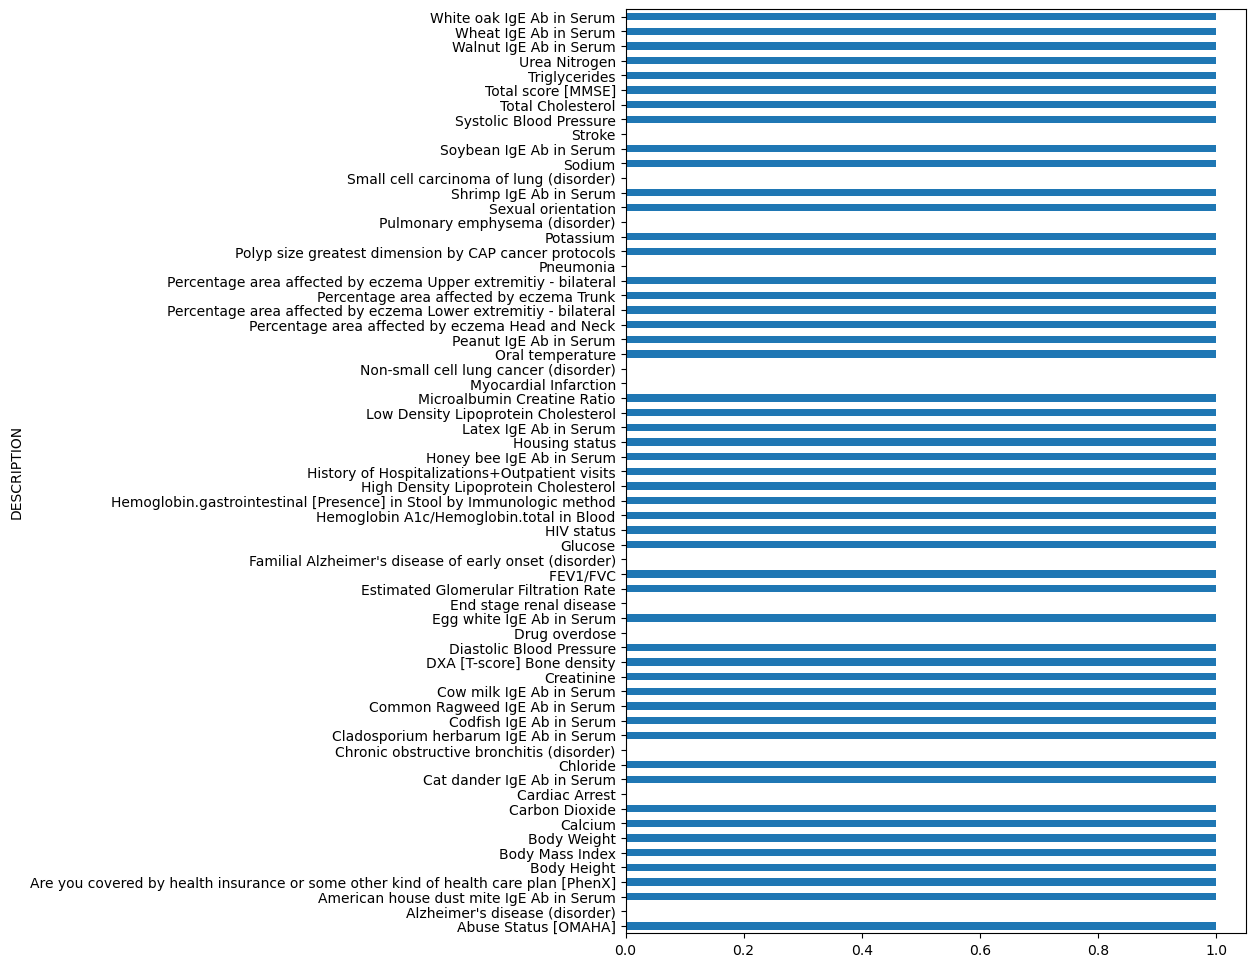

In [28]:
plt.figure(figsize=(8,12))
units.plot.barh()
plt.show()

It is apparent that each description corresponds to a single unique value. Some observations are mere diagnoses and have no UNITS at all. In this case, the `UNITS` column will be removed.

In [29]:
observations.drop(columns='UNITS', inplace=True)

Assess medications:

In [30]:
display(medications.head(3))

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,1999-05-05,NaT,660bec03-9e58-47f2-98b9-2f1c564f3838,815494d8-2570-4918-a8de-fd4000d8100f,834060,Penicillin V Potassium 250 MG,43878008.0,Streptococcal sore throat (disorder)
1,2010-08-02,NaT,660bec03-9e58-47f2-98b9-2f1c564f3838,815494d8-2570-4918-a8de-fd4000d8100f,748879,Levora 0.15/30 28 Day Pack,NaN,NaN
2,2012-11-21,2012-12-14,660bec03-9e58-47f2-98b9-2f1c564f3838,dbe481ce-b961-4f43-ac0a-07fa8cfa8bdd,310965,Ibuprofen 200 MG Oral Tablet,NaN,NaN


Again, `REASONCODE` and `REASONDESCRIPTION` will be removed from downstream analysis.

In [ ]:
medications.drop(columns=['REASONCODE'])